In [ ]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
california_housing = fetch_california_housing()

data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target
X = data.drop('PRICE', axis=1)
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.5558034669932211


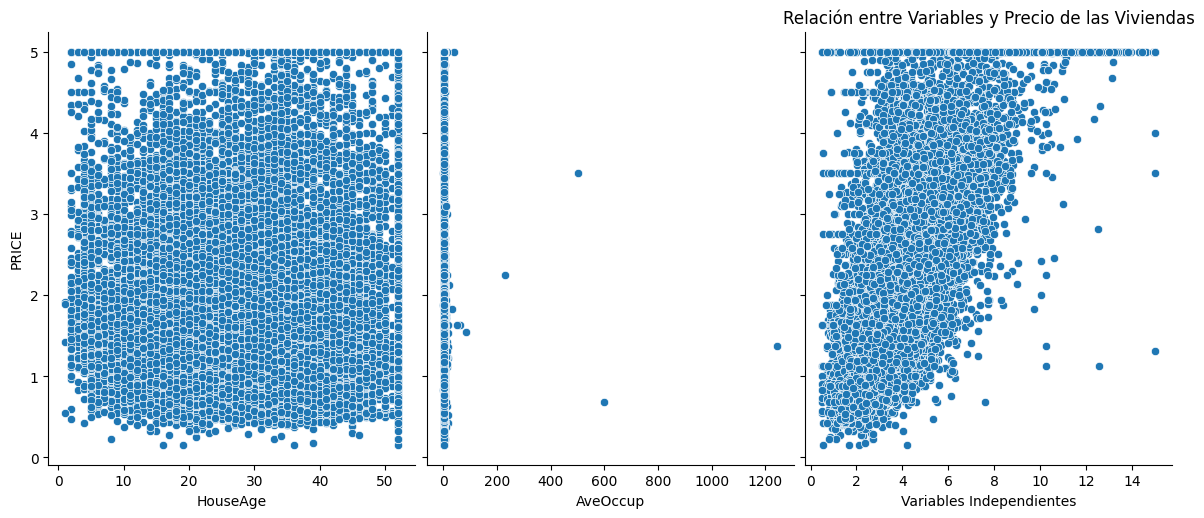

In [ ]:
sns.pairplot(data, x_vars=['HouseAge', 'AveOccup', 'MedInc'], y_vars='PRICE', height=5, aspect=0.8)
plt.title('Relación entre Variables y Precio de las Viviendas')
plt.xlabel('Variables Independientes')
plt.ylabel('Precio')
plt.show()

In [ ]:
X = data[['HouseAge', 'AveBedrms', 'Population']]  # Puedes añadir más características
y = data['PRICE']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

Coeficientes: [ 9.17574121e-03 -1.13535998e-01  1.70794963e-07]
Intercepto: 1.9337142854570737


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Métricas de evaluación
print(f"Error Cuadrático Medio (MSE) en entrenamiento: {mean_squared_error(y_train, y_train_pred)}")
print(f"Error Cuadrático Medio (MSE) en prueba: {mean_squared_error(y_test, y_test_pred)}")
print(f"Coeficiente de determinación (R^2) en entrenamiento: {r2_score(y_train, y_train_pred)}")
print(f"Coeficiente de determinación (R^2) en prueba: {r2_score(y_test, y_test_pred)}")

Error Cuadrático Medio (MSE) en entrenamiento: 1.3199989370546477
Error Cuadrático Medio (MSE) en prueba: 1.2940588825478392
Coeficiente de determinación (R^2) en entrenamiento: 0.012552025898386332
Coeficiente de determinación (R^2) en prueba: 0.012477093765801972


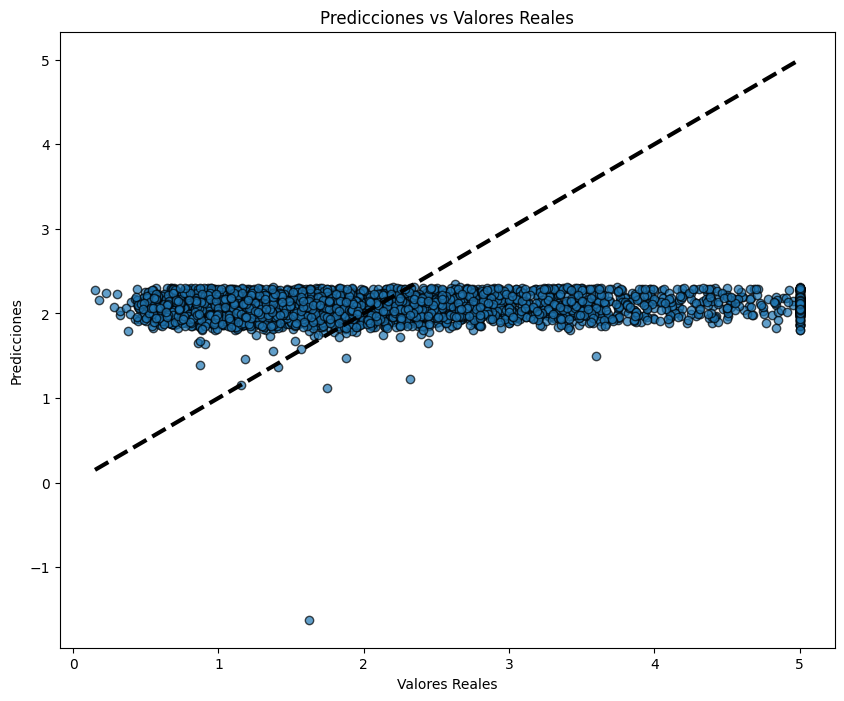

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()
